# Data Selection #

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Testing the Random Forest Algorythm on The Same Data that it was Trained On #

[-2.84872467e-02  7.60135054e-03  4.16088961e-02  1.57292109e-01
 -6.59902579e-02 -1.54729746e-01 -1.13059691e-01  1.20448902e-01
 -3.33584905e-02 -4.22241395e-01 -1.96186987e-01 -2.31698364e-01
  7.66503182e-02 -1.38049475e-01  2.75845565e-01 -1.10058253e-01
 -3.64882367e-01  3.16403086e-01 -2.48930260e-02 -1.26220260e-01
 -9.30297731e-02  5.23818890e-02  6.01037131e-02  1.09390157e-01
  1.03589089e-01  6.20769048e-02  9.76147931e-02  1.34466350e-01
  1.63482349e-01  6.64168048e-02 -4.66563569e-02 -3.07774179e-02
  7.31550064e-03  1.39549308e-01  1.56602649e-02  4.65263228e-03
 -5.51667494e-02 -1.61880805e-01  5.07615495e-02 -1.00243710e-01
 -6.52904210e-02 -1.75098649e-01 -1.89280714e-01 -1.97393732e-02
  7.36669218e-02 -8.09741695e-05 -1.91488271e-01 -1.46656367e-02
 -1.98676646e-01  4.77898222e-02 -7.16869328e-02 -8.16027691e-02
  1.92360134e-03 -9.13098549e-02  1.48336743e-01  2.11116305e-02
  2.13586412e-01 -4.61942370e-02  1.11456846e-01 -9.43672237e-02
 -1.61158503e-01 -5.07266

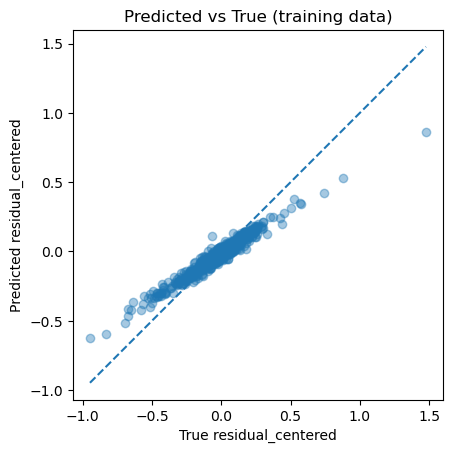

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("ZTF_DESI_data/ZTF_snia_DESI_fastspec_hostprops_papercuts_hostcuts.csv")

# ---------------------------------------------------------
# 2. Features + target
# ---------------------------------------------------------
features = [
    "LOGMSTAR",
    "SFR",
    "AGE",
    "DN4000",
    "VDISP",
    "SDSS_g_minus_r",
]

target = "residual_centered"

X = df[features]
y = df[target]

# ---------------------------------------------------------
# 3. Train Random Forest on ALL DATA
# ---------------------------------------------------------
regr = RandomForestRegressor(
    n_estimators=500,
    max_depth=200,
    random_state=42,
    n_jobs=-1,
)

regr.fit(X, y)

# ---------------------------------------------------------
# 4. Predict on ALL DATA
# ---------------------------------------------------------
y_pred = regr.predict(X)

print(y_pred)


plt.scatter(y, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--")  # 1:1 line
plt.xlabel("True residual_centered")
plt.ylabel("Predicted residual_centered")
plt.title("Predicted vs True (training data)")
plt.gca().set_aspect("equal", "box")
plt.show()

# Doing a Train-Test Split on that Same Data #

[-0.00036056 -0.0046791  -0.10076657  0.02233628 -0.12102436  0.08773447
  0.01933236 -0.04351353 -0.01663468 -0.02586993 -0.02541018 -0.10926954
 -0.04570496 -0.07862075 -0.03075615 -0.02373736 -0.00041183 -0.06901152
 -0.01263542 -0.08065204 -0.13183627 -0.02293311 -0.00069935 -0.15997386
 -0.03739122  0.01807475 -0.10381639 -0.10570908  0.03781624 -0.04640241
 -0.06626701 -0.02445766 -0.13088454 -0.01346689  0.02823842 -0.04370372
  0.06636004 -0.13784551 -0.01363449 -0.05676703  0.01438861 -0.2169062
 -0.12200505  0.03545927 -0.07539793 -0.21252378 -0.04738961 -0.02425794
 -0.06119191  0.0377175   0.01051177 -0.07545688 -0.07221421 -0.04309231
  0.05454201  0.03244186 -0.13732634 -0.01467999  0.00471821 -0.07528671
 -0.01020462  0.01417121 -0.0795643  -0.15879016  0.02791125  0.06110175
 -0.21450519  0.0219733  -0.00761314 -0.12588389 -0.13168589 -0.11825286
  0.06698126  0.01426606 -0.09226746 -0.07675646  0.08166887  0.09892881
 -0.07181545 -0.06454062  0.08854551 -0.06820984 -0.

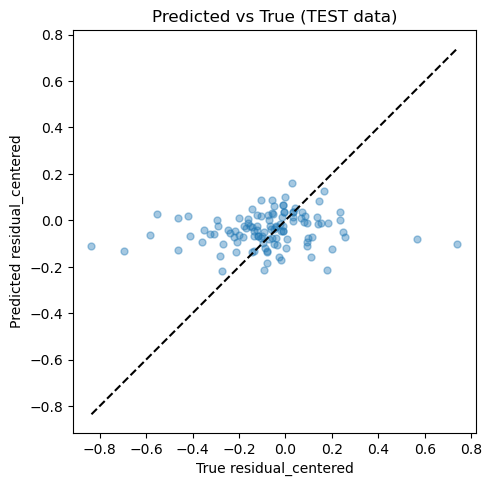

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv(
    "ZTF_DESI_data/ZTF_snia_DESI_fastspec_hostprops_papercuts_hostcuts.csv"
)

# ---------------------------------------------------------
# 2. Features + target
# ---------------------------------------------------------
features = [
    "LOGMSTAR",
    "SFR",
    "AGE",
    "DN4000",
    "VDISP",
    "SDSS_g_minus_r",
]

target = "residual_centered"

X = df[features]
y = df[target]

# ---------------------------------------------------------
# 3. Train/test split
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

# ---------------------------------------------------------
# 4. Train Random Forest on TRAINING DATA ONLY
# ---------------------------------------------------------
regr = RandomForestRegressor(
    n_estimators=1000,
    max_depth=1000,
    random_state=42,
    n_jobs=-1,
)

regr.fit(X_train, y_train)   # ✅ FIXED

# ---------------------------------------------------------
# 5. Predict ONLY on the TEST SET
# ---------------------------------------------------------
y_pred = regr.predict(X_test)  # ✅ FIXED

print(y_pred)

plt.figure(figsize=(5, 5))

plt.scatter(
    y_test,
    y_pred,
    alpha=0.4,
    s=25
)

lims = [
    min(y_test.min(), y_pred.min()),
    max(y_test.max(), y_pred.max()),
]

plt.plot(lims, lims, "--", color="black")  # 1:1 line

plt.xlabel("True residual_centered")
plt.ylabel("Predicted residual_centered")
plt.title("Predicted vs True (TEST data)")
plt.gca().set_aspect("equal", "box")

plt.tight_layout()
plt.show()